## Task 1: Implement k-means clustering from scratch. Apply it to a dataset and visualize the clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [2]:
class KMeans:
    def __init__(self, k=3, max_iters=300, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
    
    def fit(self, X):
        # Initialize centroids
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        for _ in range(self.max_iters):
            # Assign clusters
            self.labels = self._assign_clusters(X)
            # Compute new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])
            # Check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids
    
    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def predict(self, X):
        return self._assign_clusters(X)
    
    def plot_clusters(self, X):
        plt.scatter(X[:, 0], X[:, 1], c=self.labels, s=50, cmap='viridis')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', s=200, alpha=0.75)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('K-Means Clustering')
        plt.show()


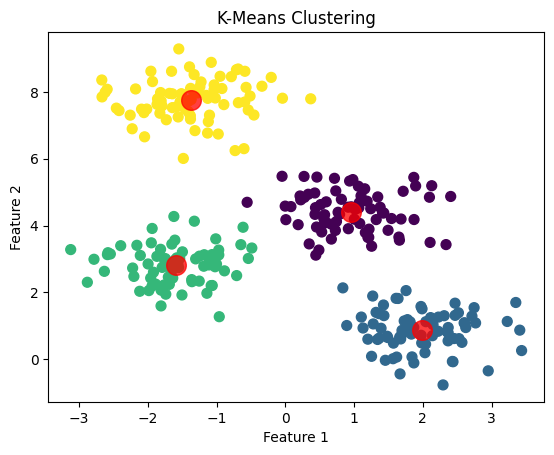

In [3]:
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Initialize KMeans
kmeans = KMeans(k=4)
kmeans.fit(X)

# Plot the results
kmeans.plot_clusters(X)


## Task 2: Perform hierarchical clustering on a dataset. Use dendrograms to decide the number of clusters.


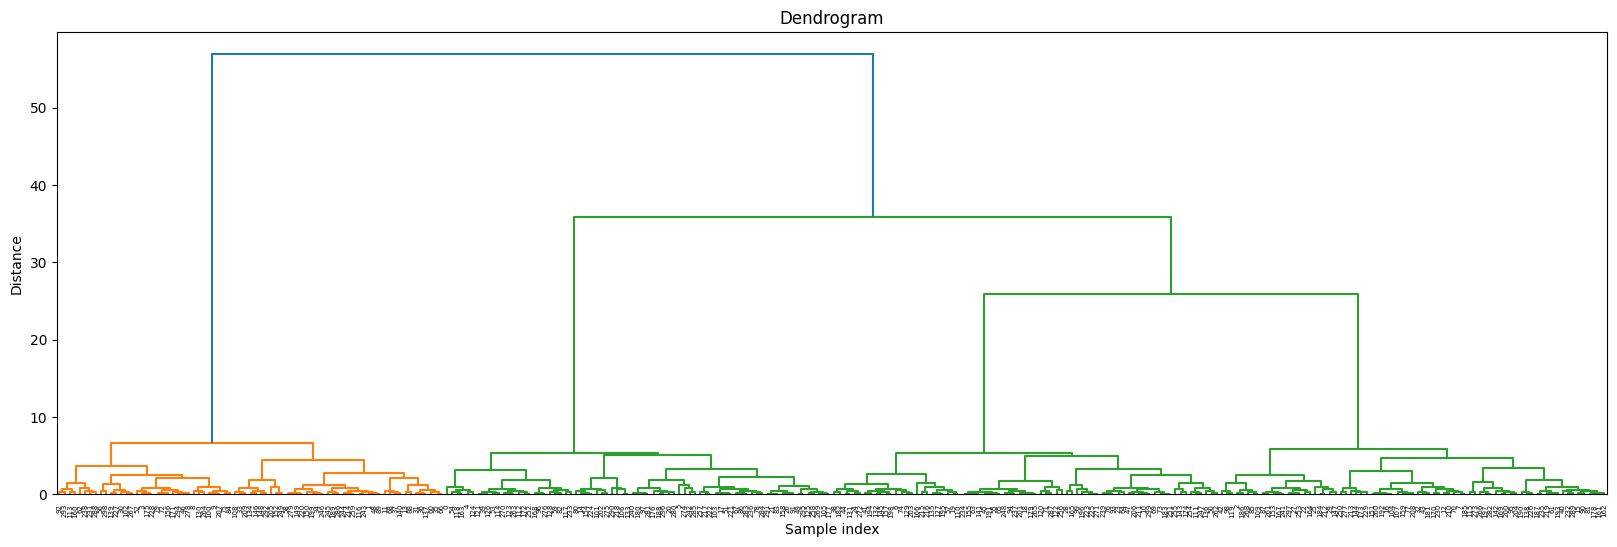

In [6]:
import scipy.cluster.hierarchy as sch
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# Perform hierarchical clustering
linkage_matrix = sch.linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(20, 6))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


## Task 3: Implement DBSCAN clustering algorithm and compare its performance with k-means on a noisy dataset.

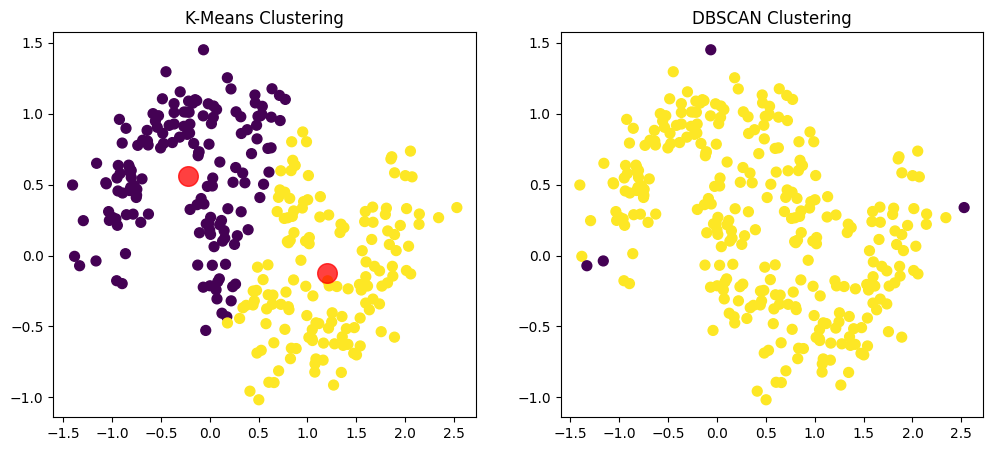

K-Means Silhouette Score: 0.471
DBSCAN did not find sufficient clusters.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Generate a noisy dataset
X, _ = make_moons(n_samples=300, noise=0.2, random_state=0)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Plot K-Means results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering')

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot DBSCAN results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

# Silhouette score for K-Means
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.3f}')

# Silhouette score for DBSCAN (excluding noise points)
unique_labels = set(dbscan_labels)
if len(unique_labels) > 1:
    if -1 not in unique_labels:
        # Calculate silhouette score directly if no noise points
        dbscan_silhouette = silhouette_score(X, dbscan_labels)
    else:
        # Exclude noise points for silhouette score calculation
        valid_labels = dbscan_labels != -1
        if len(set(dbscan_labels[valid_labels])) > 1:
            dbscan_silhouette = silhouette_score(X[valid_labels], dbscan_labels[valid_labels])
        else:
            dbscan_silhouette = -1  # Not enough valid clusters
else:
    dbscan_silhouette = -1  # Not enough clusters

print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.3f}' if dbscan_silhouette != -1 else 'DBSCAN did not find sufficient clusters.')


## Task 4: Use Gaussian Mixture Models (GMM) for clustering. Visualize the probability distributions of the clusters.

In [15]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

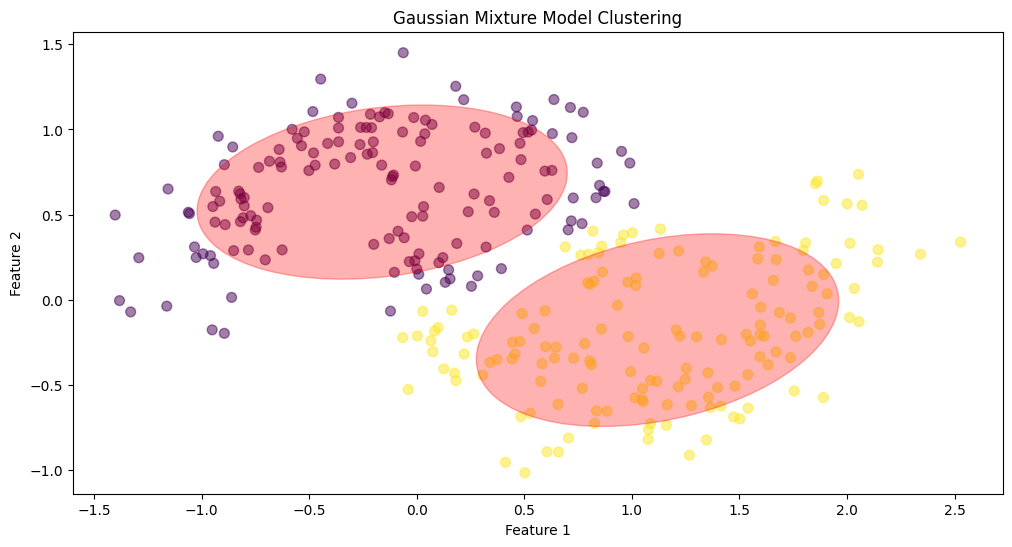

In [17]:
X, _ = make_moons(n_samples=300, noise=0.2, random_state=0)
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X)
def plot_gmm_clusters(X, gmm, labels):
    plt.figure(figsize=(12, 6))
    
    # Scatter plot of the data points
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.5)
    
    # Plot the Gaussian ellipses
    ax = plt.gca()
    for i in range(gmm.n_components):
        mean = gmm.means_[i]
        cov = gmm.covariances_[i]
        # Calculate the ellipse parameters
        v, w = np.linalg.eigh(cov)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[:, 0]
        angle = np.arctan2(u[1], u[0])
        angle = 180.0 * angle / np.pi
        ell = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color='red', alpha=0.3)

        ax.add_patch(ell)
    
    plt.title('Gaussian Mixture Model Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the results
plot_gmm_clusters(X, gmm, gmm_labels)


## Task 5: Implement an anomaly detection system using Isolation Forest and Local Outlier Factor (LOF) on a dataset

In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

iso_forest = IsolationForest(contamination=0.1)
iso_forest.fit(X)
# Predict anomalies
iso_labels = iso_forest.predict(X)

# Initialize the model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_labels = lof.fit_predict(X)

print("Number of anomalies detected by Isolation Forest:", sum(iso_labels == -1))
print("Number of anomalies detected by LOF:", sum(lof_labels == -1))




Number of anomalies detected by Isolation Forest: 30
Number of anomalies detected by LOF: 30
